In [3]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import palettable
from astropy.time import Time
from astropy.io import ascii
from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [224]:
%matplotlib inline


19866

In [378]:
times=np.arange(53500,61000 , 1)
rates=5*np.sin(2*np.pi*times/365.0)#+(30*np.sin(7*times+60))+(50*np.sin(17*times+60))#+(5*np.sin(0.6790*times))+np.sin(.009*times+7500)+np.sin(.03*times+750)
jmax=10
#for j in range(0,jmax):
   
#    g_third=len(rates)/jmax

 #   if j==0:

  #      rates[j:g_third]=0.1*rates[0:g_third]
   # else:
    #    p=0.1*j

     #   rates[j*g_third:(j+1)*g_third]=p*rates[j*g_third:(j+1)*g_third]
###randomly remove some of this data
resamp=np.random.randint(len(times), size=4800)
print resamp.shape
sine_rates=np.delete(rates, resamp)
del_times=np.delete(times, resamp)

print sine_rates.shape
sine_rates[np.where(sine_rates<0)]=0



(4800,)
(3975,)


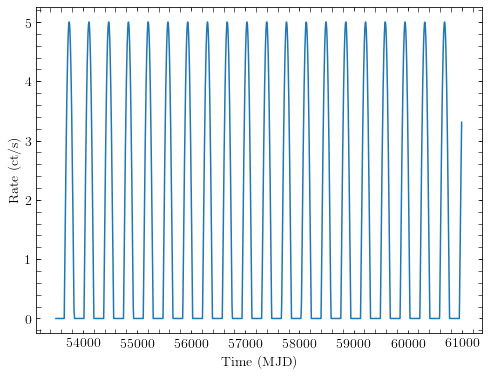

In [379]:
plt.figure(figsize=(8,6))
plt.plot(del_times, sine_rates)
plt.minorticks_on()                                                              # To plot minor ticks
plt.tick_params(axis='both', which='major', labelsize=14)                        # To set tick label fontsize
plt.tick_params(axis='both', which='maor', length=9)                            # To set tick size
plt.tick_params(axis='both', which='minor', length=4.5)                          # To set tick size
plt.tick_params(axis='both', which='both',direction='in',right=True, top=True)   # To plot ticks inwards instead of out
plt.xlim()
plt.xlabel('Time (MJD)', fontsize=14)
plt.ylabel('Rate (ct/s)', fontsize=14);

In [380]:

formatted_time= Time((del_times),format='mjd',out_subfmt='date_hms').isot
formatted_data = Table([formatted_time,sine_rates],names=['ds','y']).to_pandas()

In [381]:
df = formatted_data

df_train=df[0:3500]
df_test=df[3500:]   # Note that element 3000 will be in df_train, but not in df_test (no need for 3001 instead of it)

In [397]:

m = Prophet(yearly_seasonality=True,weekly_seasonality=True,seasonality_mode='multiplicative',changepoint_prior_scale=.1)


m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [398]:
future = m.make_future_dataframe(periods=665)

future.tail()

,ds
4160,2025-04-13
4161,2025-04-14
4162,2025-04-15
4163,2025-04-16
4164,2025-04-17


In [399]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
4160,2025-04-13,0.050272,-0.020119,0.122107
4161,2025-04-14,0.023905,-0.051725,0.098960
4162,2025-04-15,-0.001565,-0.073900,0.069887
4163,2025-04-16,-0.014246,-0.079006,0.056609
4164,2025-04-17,-0.028295,-0.103293,0.039080


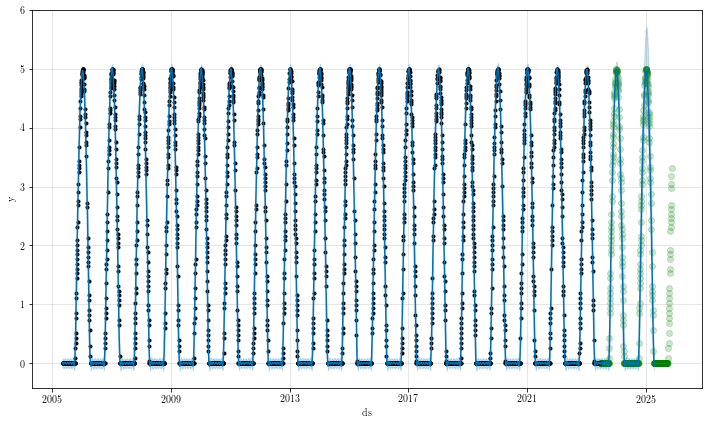

In [400]:
#plt.figure()
m.plot(forecast);
plt.plot_date(Time(del_times,format='mjd',out_subfmt='date_hms').datetime[3501:], sine_rates[3501:], 'go', zorder=0, alpha=0.2)

